In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/ameen/Downloads/Visadataset - Visadataset.csv")

In [3]:
cat = df.select_dtypes(include = "object").columns
num = df.select_dtypes(exclude = "object").columns

In [4]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

- Scaling is the one of the most important step before model development, scaling makes all the columns under one scale

- scaling is used to make all the columns as features to make them comparable

- some machine learning models work on distance methods
    - example: age minimum value is 0, maximum is 100. but income might be lakhs or crores or more, if we don't do scaling i.e age and income under one scale the model will treat income as the important value.

    - when values are huge, the math becomes more complex, so it is better to lower down the values
 
    - All the features under one scale, so it is easy to compare
 
    - ex: Dollars and rupees have different values, so we cannot compare them unless we scale them

### Standard scaler

- Also called Z scale, makes mean value 0 and standard deviation is always equal to 1.

- z = (x - u)std

In [6]:
# step-1 x = prevailing wage data
# step-2 mean = mean of pw
# step-3 std = std of pw
# step-4 = step1 - step2
# step-5 = step4/step3

In [17]:
x = df['prevailing_wage']
u = x.mean()
std = x.std()
standard_z = (x - u)/std
standard_z

0       -1.398510
1        0.169832
2        0.919060
3        0.169991
4        1.428576
           ...   
25475    0.049923
25476    3.876083
25477    1.360253
25478    0.221504
25479   -0.067762
Name: prevailing_wage, Length: 25480, dtype: float64

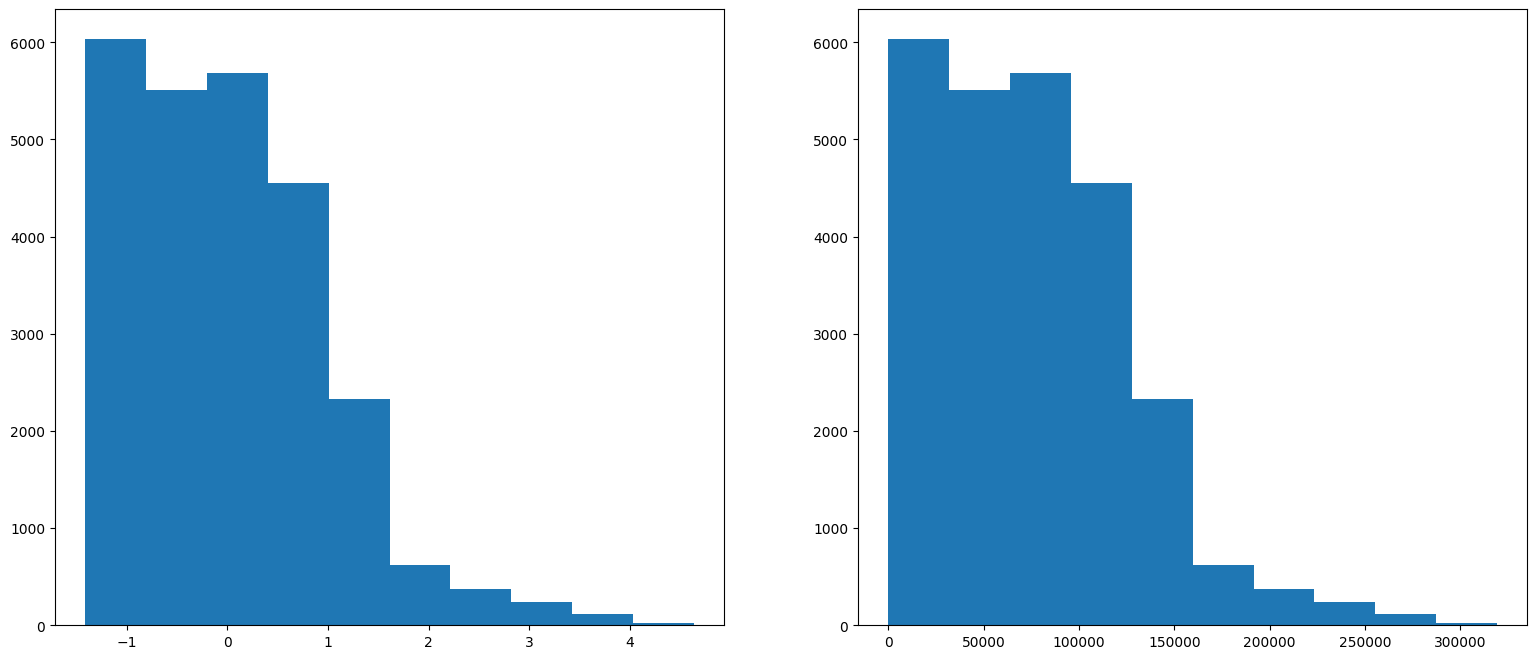

In [18]:
plt.figure(figsize = (19,8))
plt.subplot(1,2,1).hist(standard_z)
plt.subplot(1,2,2).hist(df['prevailing_wage'])
plt.show()

In [9]:
df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()

In [13]:
ss.fit_transform(df[['prevailing_wage']])

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

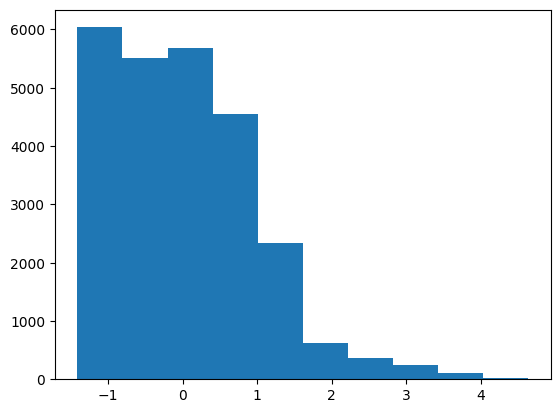

In [15]:
plt.hist(ss.fit_transform(df[['prevailing_wage']]))
plt.show()

In [20]:
X = df['prevailing_wage']
MinMax_z = (X - np.min(X)) / (np.max(X) - np.min(X))

<Axes: >

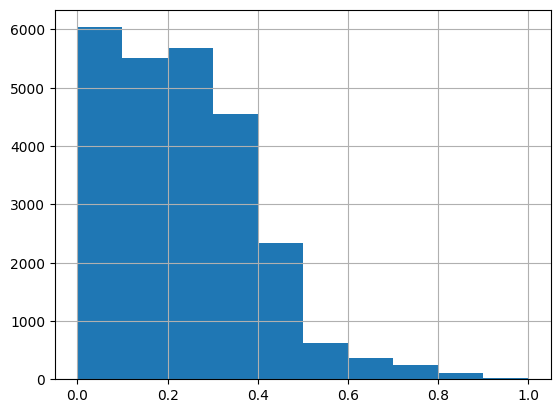

In [22]:
MinMax_z.hist()

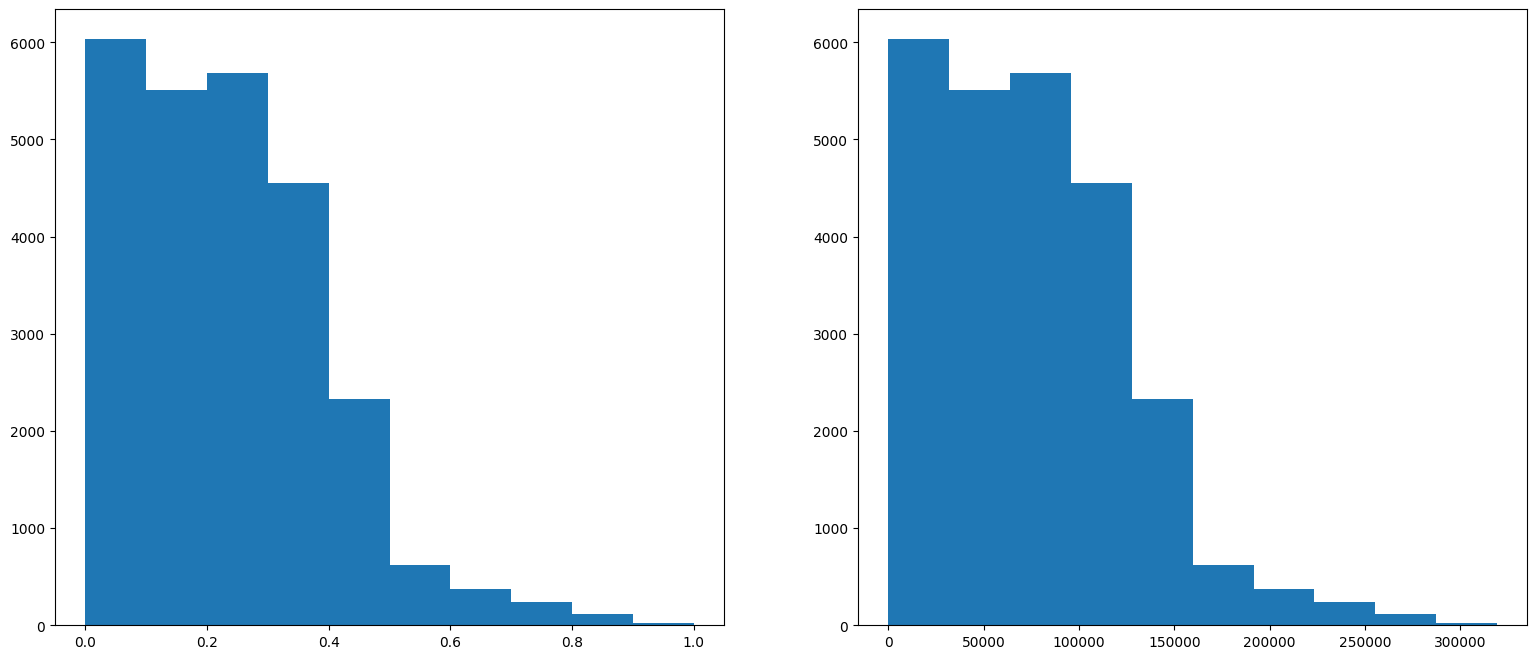

In [23]:
plt.figure(figsize = (19,8))
plt.subplot(1,2,1).hist(MinMax_z)
plt.subplot(1,2,2).hist(df['prevailing_wage'])
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
MMS = MinMaxScaler()

In [28]:
MMS.fit_transform(df[['prevailing_wage']])

array([[0.00184853],
       [0.2613452 ],
       [0.385312  ],
       ...,
       [0.45831136],
       [0.26989486],
       [0.22203311]])

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

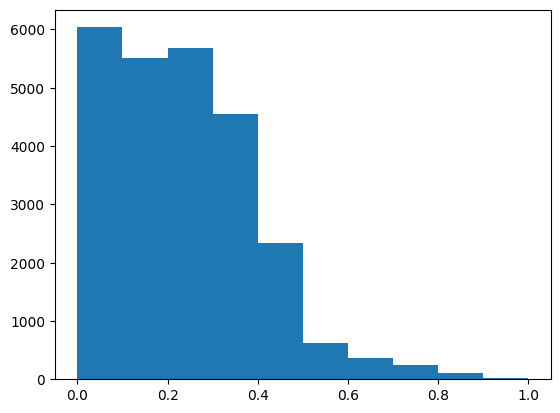

In [29]:
plt.hist(MMS.fit_transform(df[['prevailing_wage']]))

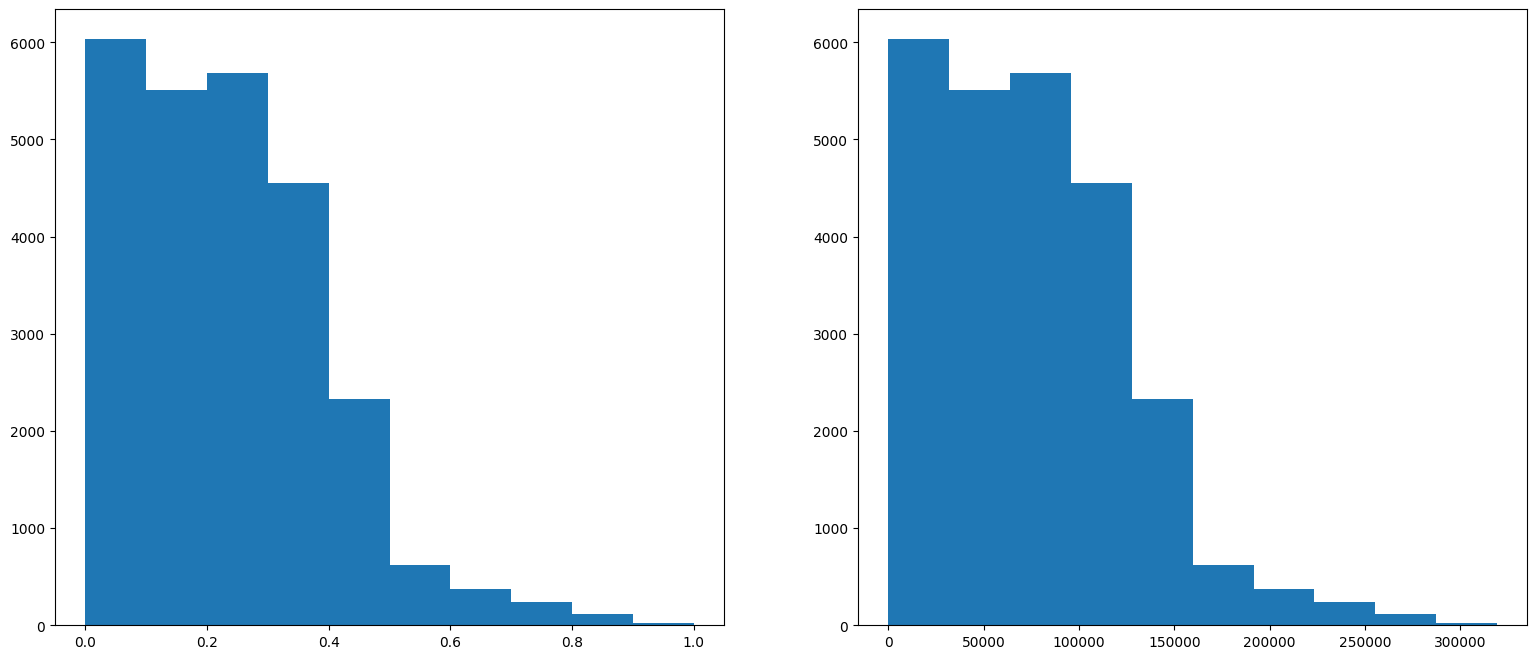

In [30]:
plt.figure(figsize = (19,8))
plt.subplot(1,2,1).hist(MMS.fit_transform(df[['prevailing_wage']]))
plt.subplot(1,2,2).hist(df['prevailing_wage'])
plt.show()